### Name- Bharat Bishnoi
### Reg no -21BCE5218


### EX 7 SOM

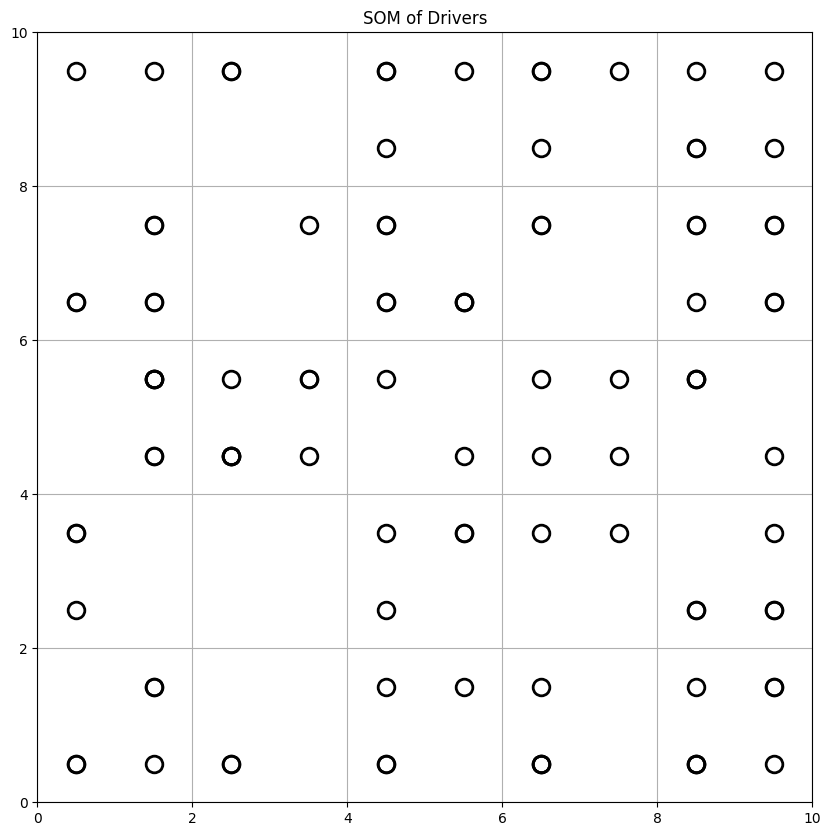

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from matplotlib import pyplot as plt

# Ensure you have the necessary libraries installed:
# pip install numpy pandas matplotlib minisom sklearn

# Load data from CSV
data = pd.read_csv('driver_data.csv')

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(data)

# Initialize and train SOM
# The dimensions of the SOM (10x10) and other parameters can be adjusted as needed
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize weights and train with the normalized data
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=500)

# Visualizing the results using matplotlib to plot the winning positions on the map
plt.figure(figsize=(10, 10))
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markeredgecolor='k', markerfacecolor='None', markersize=12, markeredgewidth=2)
plt.title('SOM of Drivers')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('driver_data.csv')

# Select features - assuming these are named 'velocity', 'acceleration', 'brake_intensity'
features = data[['speed', 'acceleration', 'brake_intensity']]

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(features)


Iteration 1000


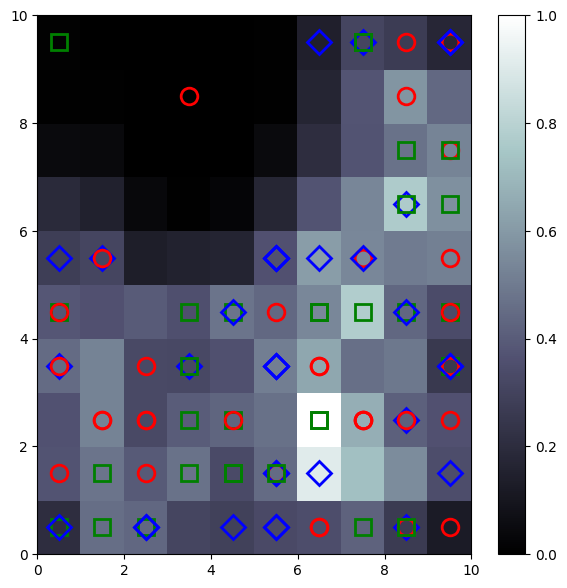

Iteration 2000


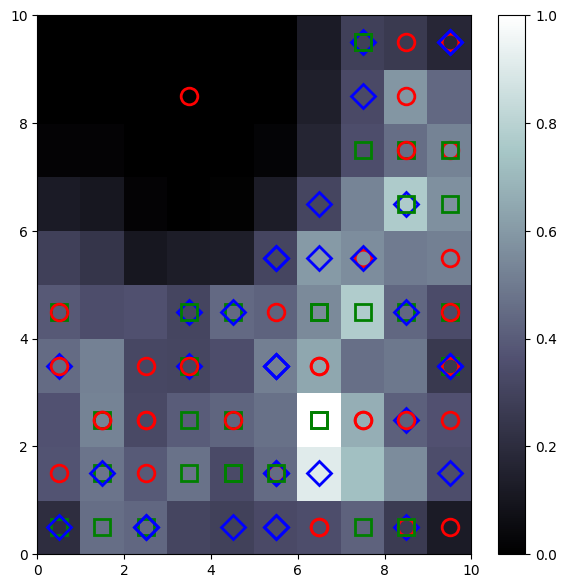

Iteration 3000


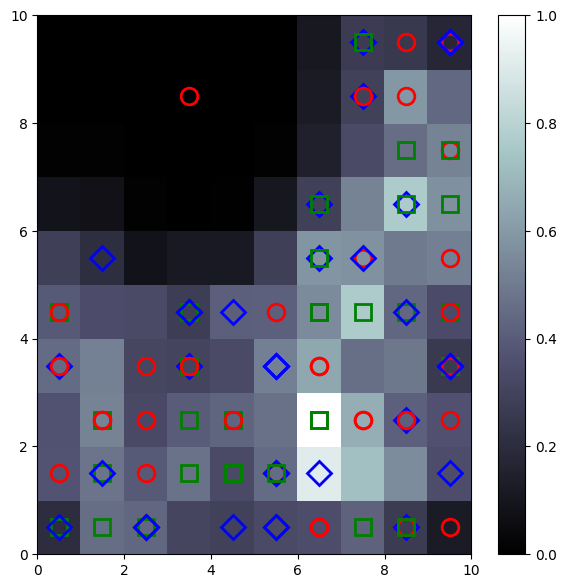

Iteration 4000


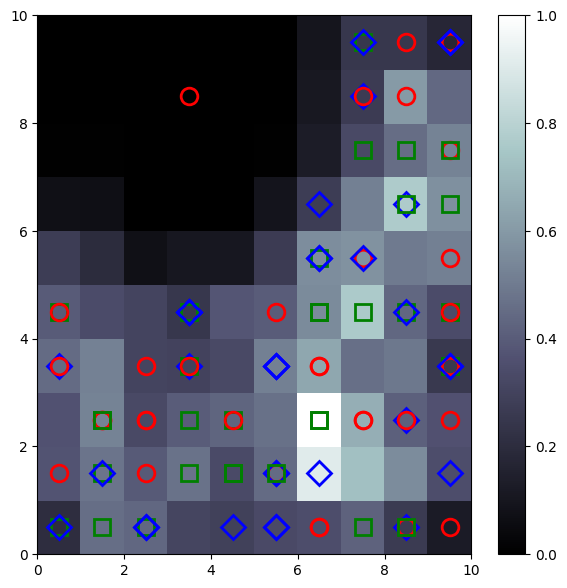

Iteration 5000


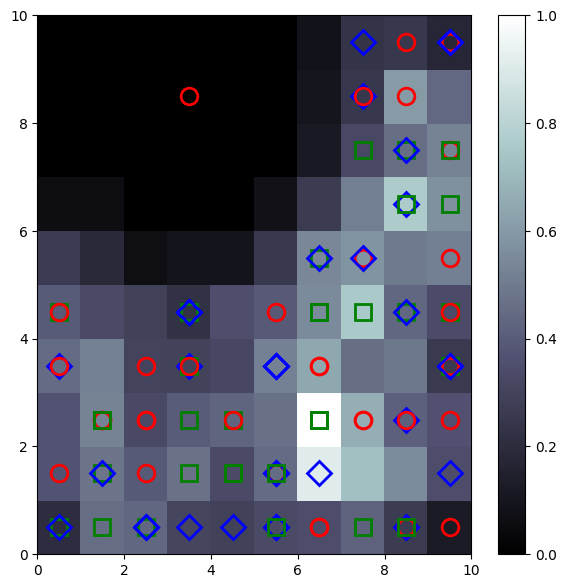

Iteration 6000


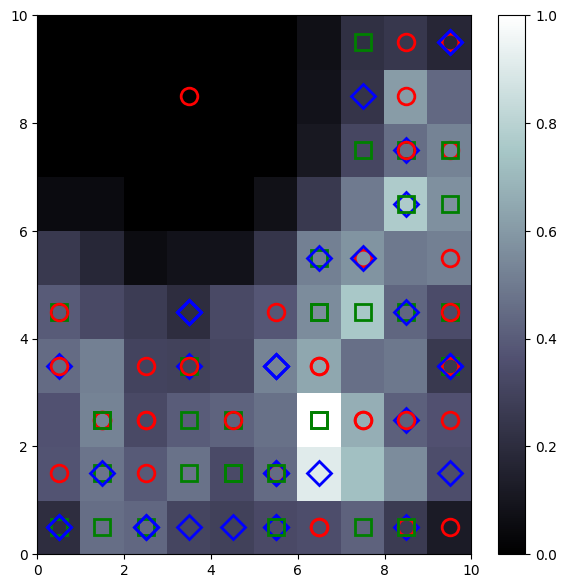

Iteration 7000


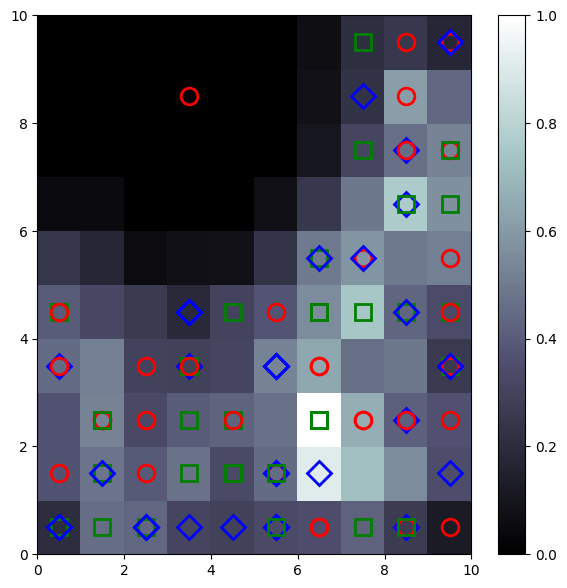

Iteration 8000


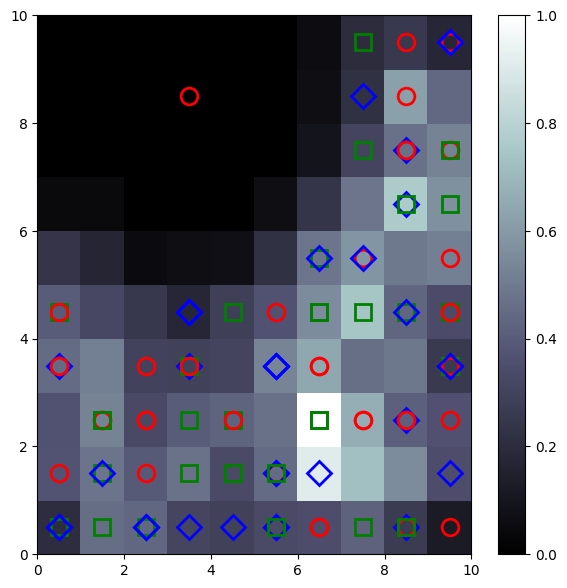

Iteration 9000


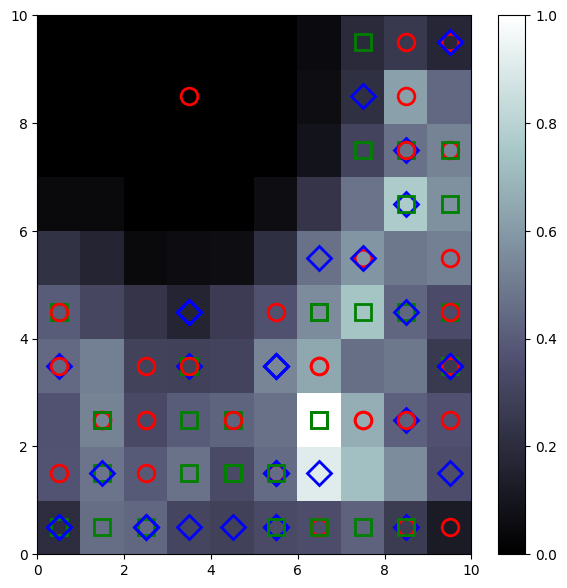

Iteration 10000


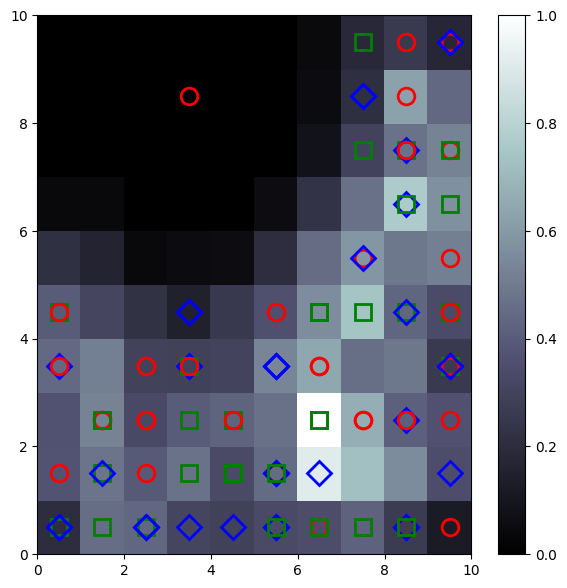

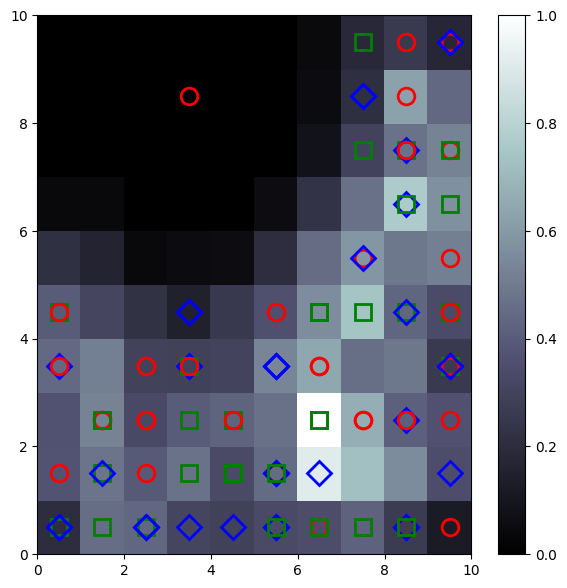

In [8]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from pylab import plot, axis, show, pcolor, colorbar, bone

# Assuming X_scaled is defined and scaled appropriately
# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5, random_seed=1)

# Randomly initialize weights
som.random_weights_init(X_scaled)

# Define a function to plot the SOM
def plot_som(som):
    plt.figure(figsize=(7, 7))
    bone()
    pcolor(som.distance_map().T)  # Distance map as background
    colorbar()
    markers = ['o', 's', 'D']  # Assuming three classes for the example
    colors = ['r', 'g', 'b']
    for cnt, xx in enumerate(X_scaled):
        w = som.winner(xx)  # Getting the winner
        plot(w[0]+.5, w[1]+.5, markers[cnt % len(markers)], markerfacecolor='None',
             markeredgecolor=colors[cnt % len(colors)], markersize=12, markeredgewidth=2)
    axis([0, som._weights.shape[0], 0, som._weights.shape[1]])
    plt.show()

# Train the SOM with visualization
num_iteration = 10000
update_interval = 1000  # Update the plot after this many iterations
for iteration in range(1, num_iteration + 1):
    # Randomly pick an input and train
    rand_i = np.random.randint(len(X_scaled))
    som.train_random(X_scaled, 1)  # Train with 1 iteration at a time
    if iteration % update_interval == 0:
        print(f"Iteration {iteration}")
        plot_som(som)

# Final SOM visualization
plot_som(som)


# ASSOM

In [11]:
import pandas as pd
import numpy as np

# Load the dataset
data_path = 'ASSOM_synthetic_data.csv'  # Update this to the path where you downloaded the file
data = pd.read_csv(data_path)

# Convert DataFrame to numpy array for processing
data = data.values



In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from minisom import MiniSom

# Extend MiniSom with ASSOM capabilities
class ASSOM(MiniSom):
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5, decay_function=None, random_seed=None, num_basis=2):
        if decay_function is None:
            decay_function = lambda x, t, max_iter: x / (1 + t / (max_iter / 2))
        super().__init__(x, y, input_len, sigma, learning_rate, decay_function, neighborhood_function='gaussian', random_seed=random_seed)
        self.num_basis = num_basis
        self.weights = np.random.random((x, y, num_basis, input_len))
        self.learning_rate = learning_rate
        self.sigma = sigma

    def update(self, x, win, t, max_iter):
        eta = self._decay_function(self.learning_rate, t, max_iter)
        sig = self._decay_function(self.sigma, t, max_iter)
        for i in range(self.weights.shape[0]):
            for j in range(self.weights.shape[1]):
                for b in range(self.num_basis):
                    d = np.linalg.norm([i - win[0], j - win[1]])
                    if d <= sig:
                        influence = np.exp(-d**2 / (2 * (sig ** 2)))
                        self.weights[i, j, b] += eta * influence * (x - self.weights[i, j, b])



In [23]:
# Initialize parameters
x, y, input_len, num_basis = 7, 7, 10, 2  # dimensions, input length, number of basis vectors
assom = ASSOM(x, y, input_len, sigma=2.0, learning_rate=0.5, num_basis=num_basis)

# Load data
data = np.random.rand(100, 10)  # Random data for illustration, replace with your actual dataset

# Setup the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))
ims = []

# Training loop with visualization update
for iteration in range(1, 501):
    idx = np.random.randint(0, len(data))
    assom.update(data[idx], assom.winner(data[idx]), iteration, 500)
    if iteration % 10 == 0:  # Update every 10 iterations
        img = np.zeros((x, y))
        for i in range(x):
            for j in range(y):
                img[i, j] = np.mean(assom.weights[i, j])  # Average over basis vectors for visualization
        im = ax.imshow(img, animated=True)
        ims.append([im])
        plt.title(f'Iteration: {iteration}')

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=1000)
plt.close()

# Display the animation
HTML(ani.to_jshtml())
